# Multi-Label Classification with Logistic Regression

This notebook demonstrates a manual implementation of multi-label classification using Logistic Regression, following the approach in the referenced journal. We will use TF-IDF features extracted from Hadith text, and manually train a binary classifier for each label (anjuran, larangan, informasi).

In [ ]:
import pickle
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report

# ============================
# 1. Menyiapkan Data Aktual (X, Y)
# ============================
with open("../data/tfidf/tfidf_training.pkl", "rb") as f:
    X_train_tfidf = pickle.load(f).toarray()  # X = data fitur (hasil TF-IDF)

df_train = pd.read_csv("../data/processed/preprocessed_training.csv", delimiter=";")
y_train = df_train[['anjuran', 'larangan', 'informasi']].values  # Y = label multi-label

# ============================
# 2. Inisialisasi Bobot dan Bias
# ============================
class ManualLogisticRegression:
    def __init__(self, learning_rate=0.1, n_iter=1000):
        self.lr = learning_rate        # α = learning rate
        self.n_iter = n_iter           # jumlah iterasi (epoch)
        self.weights = None            # bobot awal w = 0
        self.bias = None               # bias awal b = 0

    # ============================
    # 4. Menerapkan Fungsi Sigmoid
    # Rumus: sigmoid(z) = 1 / (1 + e^(-z))
    # ============================
    @staticmethod
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Inisialisasi bobot dan bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # ============================
        # Proses iterasi Gradient Descent
        # ============================
        for _ in range(self.n_iter):

            # ============================
            # 3. Menghitung Prediksi Awal (z = Xw + b)
            # ============================
            linear_pred = np.dot(X, self.weights) + self.bias

            # ============================
            # 4. Menerapkan Sigmoid → Y_pred
            # ============================
            y_pred = self.sigmoid(linear_pred)

            # ============================
            # 5. Menghitung Fungsi Biaya (Opsional, bisa tambahkan loss log loss jika ingin)
            # 6. Menghitung Turunan Parsial (gradien)
            # dw = (1/n) * X.T · (Y_pred - Y)
            # db = (1/n) * jumlah(Y_pred - Y)
            # ============================
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # ============================
            # 7. Memperbarui Bobot dan Bias
            # w = w - α * dw
            # b = b - α * db
            # ============================
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    # ============================
    # 8. Menghitung Prediksi Akhir
    # Jika sigmoid ≥ 0.5 → 1, jika < 0.5 → 0
    # ============================
    def predict(self, X, threshold=0.5):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_pred)
        return (y_pred >= threshold).astype(int)

# ============================
# Melatih model untuk setiap label: anjuran, larangan, informasi
# ============================
models = {}
labels = ['anjuran', 'larangan', 'informasi']

for i, label in enumerate(labels):
    print(f"\n=== Melatih model untuk label: {label} ===")

    # Inisialisasi model
    lr = ManualLogisticRegression(learning_rate=0.01, n_iter=2000)
    lr.fit(X_train_tfidf, y_train[:, i])

    # Simpan model per label
    models[label] = lr

    # Prediksi pada data training
    y_pred = lr.predict(X_train_tfidf)

    # ============================
    # 9. Menghitung Confusion Matrix
    # 10. Menghitung Ukuran Statistik (Presisi, Recall, F1)
    # Menggunakan classification_report dari sklearn
    # ============================
    print(classification_report(
        y_train[:, i],
        y_pred,
        target_names=[f'Tidak {label}', label]
    ))

# ============================
# Menyimpan semua model dalam satu file pickle
# ============================
with open("../models/manual_logreg_models.pkl", "wb") as f:
    pickle.dump(models, f)

# ============================
# Fungsi untuk memprediksi semua label sekaligus
# ============================
def predict_all_labels(X, models, threshold=0.5):
    y_pred = np.zeros((X.shape[0], len(models)))  # [jumlah_data x 3 label]
    for i, label in enumerate(models.keys()):
        y_pred[:, i] = models[label].predict(X, threshold)
    return y_pred

# ============================
# Contoh penggunaan prediksi multi-label
# ============================
y_train_pred = predict_all_labels(X_train_tfidf, models)
print("\nHasil Prediksi untuk semua label:")
print(pd.DataFrame(y_train_pred, columns=labels).head())



=== Melatih model untuk label: anjuran ===


C:\Users\mynam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mynam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mynam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471

               precision    recall  f1-score   support

Tidak anjuran       0.80      1.00      0.89      4489
      anjuran       0.00      0.00      0.00      1112

     accuracy                           0.80      5601
    macro avg       0.40      0.50      0.44      5601
 weighted avg       0.64      0.80      0.71      5601


=== Melatih model untuk label: larangan ===


C:\Users\mynam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mynam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mynam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471

                precision    recall  f1-score   support

Tidak larangan       0.88      1.00      0.94      4938
      larangan       0.00      0.00      0.00       663

      accuracy                           0.88      5601
     macro avg       0.44      0.50      0.47      5601
  weighted avg       0.78      0.88      0.83      5601


=== Melatih model untuk label: informasi ===
                 precision    recall  f1-score   support

Tidak informasi       0.00      0.00      0.00       229
      informasi       0.96      1.00      0.98      5372

       accuracy                           0.96      5601
      macro avg       0.48      0.50      0.49      5601
   weighted avg       0.92      0.96      0.94      5601


Hasil Prediksi untuk semua label:
   anjuran  larangan  informasi
0      0.0       0.0        1.0
1      0.0       0.0        1.0
2      0.0       0.0        1.0
3      0.0       0.0        1.0
4      0.0       0.0        1.0


C:\Users\mynam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mynam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mynam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471


🔧 Training untuk label: anjuran

📄 Data Aktual (5 pertama):
X (TF-IDF): [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Y (Label): [1, 0, 0, 0, 0]

🚀 Memulai Gradient Descent (1000 iterasi)...


Training anjuran:   0%|          | 1/1000 [00:27<7:31:14, 27.10s/it]

Epoch 0 - Cost: 0.6931


Training anjuran:  10%|█         | 101/1000 [40:17<5:29:07, 21.97s/it]

Epoch 100 - Cost: 0.4998


Training anjuran:  20%|██        | 201/1000 [1:16:35<4:48:31, 21.67s/it]

Epoch 200 - Cost: 0.4948


Training anjuran:  30%|███       | 301/1000 [1:52:50<4:15:11, 21.90s/it]

Epoch 300 - Cost: 0.4928


Training anjuran:  40%|████      | 401/1000 [2:30:38<3:46:05, 22.65s/it]

Epoch 400 - Cost: 0.4910


Training anjuran:  50%|█████     | 501/1000 [3:10:08<3:21:33, 24.24s/it]

Epoch 500 - Cost: 0.4892


Training anjuran:  60%|██████    | 601/1000 [3:49:03<2:28:03, 22.26s/it]

Epoch 600 - Cost: 0.4874


Training anjuran:  70%|███████   | 701/1000 [4:26:01<1:49:43, 22.02s/it]

Epoch 700 - Cost: 0.4856


Training anjuran:  80%|████████  | 801/1000 [5:02:48<1:13:38, 22.20s/it]

Epoch 800 - Cost: 0.4839


Training anjuran:  90%|█████████ | 901/1000 [5:39:46<36:17, 22.00s/it]  

Epoch 900 - Cost: 0.4822


Training anjuran: 100%|██████████| 1000/1000 [6:16:16<00:00, 22.58s/it]
C:\Users\mynam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


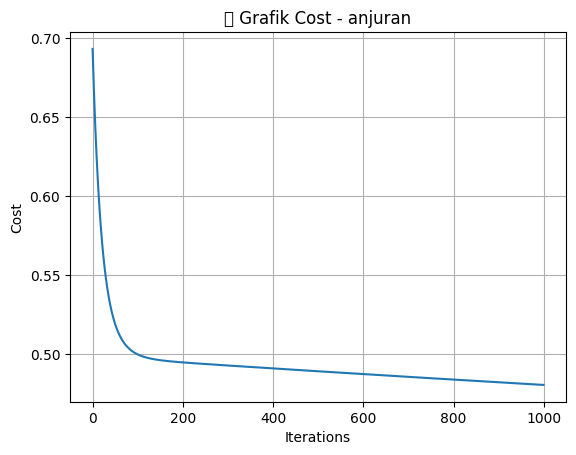


📌 Bobot dan Bias Akhir:
W (10 bobot pertama): [-0.001238142695970785, -0.0009670876938719325, -0.0006971040448049448, -0.00013199554003586852, -0.0006012052244346957, -0.004102149554122492, -0.0009893075204496348, 0.0019570423087743485, -0.0009978048330521083, -0.0006577805868944185]
b: -1.3612821656426672


C:\Users\mynam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


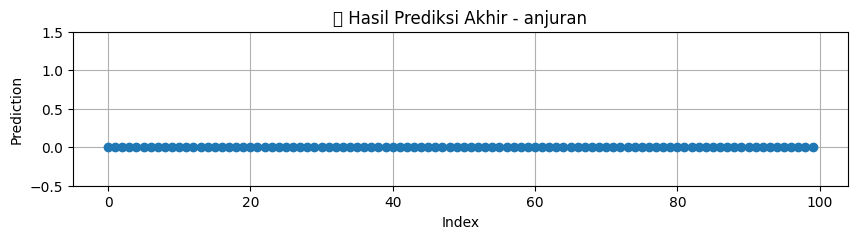


🔧 Training untuk label: larangan

📄 Data Aktual (5 pertama):
X (TF-IDF): [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Y (Label): [1, 0, 1, 0, 0]

🚀 Memulai Gradient Descent (1000 iterasi)...


Training larangan:   0%|          | 1/1000 [00:23<6:23:03, 23.01s/it]

Epoch 0 - Cost: 0.6931


Training larangan:  10%|█         | 101/1000 [37:21<5:32:38, 22.20s/it]

Epoch 100 - Cost: 0.3724


Training larangan:  20%|██        | 201/1000 [1:14:26<4:54:55, 22.15s/it]

Epoch 200 - Cost: 0.3606


Training larangan:  30%|███       | 301/1000 [1:51:32<4:18:03, 22.15s/it]

Epoch 300 - Cost: 0.3580


Training larangan:  40%|████      | 401/1000 [2:28:37<3:42:44, 22.31s/it]

Epoch 400 - Cost: 0.3561


Training larangan:  50%|█████     | 501/1000 [3:05:50<3:05:30, 22.31s/it]

Epoch 500 - Cost: 0.3544


Training larangan:  60%|██████    | 601/1000 [3:42:54<2:27:43, 22.21s/it]

Epoch 600 - Cost: 0.3526


Training larangan:  70%|███████   | 701/1000 [4:19:59<1:50:45, 22.23s/it]

Epoch 700 - Cost: 0.3509


Training larangan:  80%|████████  | 801/1000 [4:57:21<1:16:02, 22.93s/it]

Epoch 800 - Cost: 0.3492


Training larangan:  90%|█████████ | 901/1000 [5:34:46<37:13, 22.56s/it]  

Epoch 900 - Cost: 0.3475


Training larangan: 100%|██████████| 1000/1000 [6:11:45<00:00, 22.31s/it]


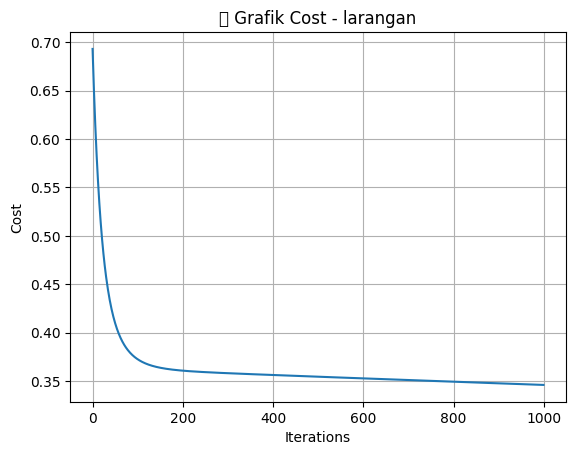


📌 Bobot dan Bias Akhir:
W (10 bobot pertama): [-0.000808466743545138, -0.0006355097640362591, -0.00045769737159908084, -8.346635413663498e-05, -0.0003961111430614725, -0.002697751521300788, -0.0018853001137866833, -0.00033391110315183635, -0.0006637504952781303, -0.0004325972967246826]
b: -1.9324561779720537


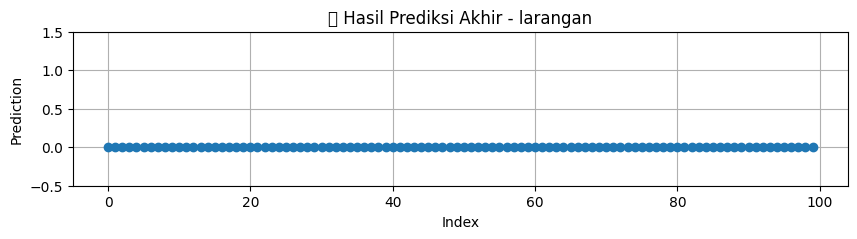


🔧 Training untuk label: informasi

📄 Data Aktual (5 pertama):
X (TF-IDF): [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Y (Label): [1, 1, 1, 1, 1]

🚀 Memulai Gradient Descent (1000 iterasi)...


Training informasi:   0%|          | 1/1000 [00:22<6:20:50, 22.87s/it]

Epoch 0 - Cost: 0.6931


Training informasi:  10%|█         | 101/1000 [39:15<5:36:39, 22.47s/it]

Epoch 100 - Cost: 0.2092


Training informasi:  20%|██        | 201/1000 [1:16:35<5:00:57, 22.60s/it]

Epoch 200 - Cost: 0.1794


Training informasi:  30%|███       | 301/1000 [1:53:51<4:19:31, 22.28s/it]

Epoch 300 - Cost: 0.1726


Training informasi:  40%|████      | 401/1000 [2:32:13<3:48:05, 22.85s/it]

Epoch 400 - Cost: 0.1703


Training informasi:  50%|█████     | 501/1000 [3:10:29<3:04:27, 22.18s/it]

Epoch 500 - Cost: 0.1693


Training informasi:  60%|██████    | 601/1000 [3:50:34<2:56:13, 26.50s/it]

Epoch 600 - Cost: 0.1688


Training informasi:  70%|███████   | 701/1000 [4:27:55<1:50:19, 22.14s/it]

Epoch 700 - Cost: 0.1684


Training informasi:  80%|████████  | 801/1000 [5:05:56<1:14:18, 22.40s/it]

Epoch 800 - Cost: 0.1681


Training informasi:  90%|█████████ | 901/1000 [5:48:58<36:13, 21.96s/it]  

Epoch 900 - Cost: 0.1678


Training informasi: 100%|██████████| 1000/1000 [6:25:23<00:00, 23.12s/it]


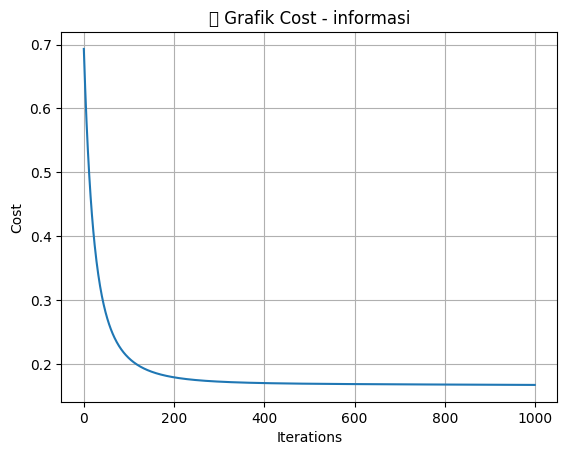


📌 Bobot dan Bias Akhir:
W (10 bobot pertama): [0.0004217082359855989, 0.0003297414347359908, 0.00023616461982608973, 4.383386447202547e-05, 0.00020605714205285157, 0.0014148492682986903, 0.000994664969583798, 0.00017542347408032758, 0.00034901381833468887, 0.0002173664469219218]
b: 3.022949961001247


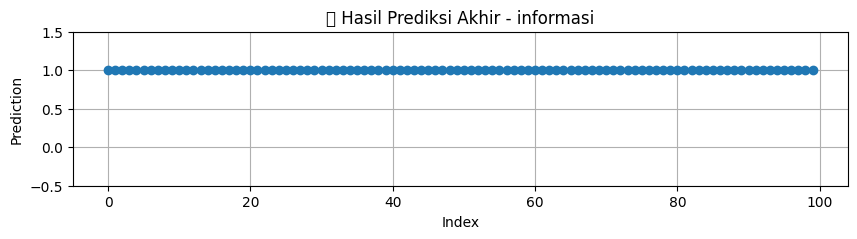

✅ Model berhasil disimpan ke '../models/LR_manual_jurnal.pkl'


In [2]:
# === Import library ===
import pickle                      # Untuk membaca file .pkl (TF-IDF)
import pandas as pd               # Untuk memproses file CSV
import math                       # Untuk operasi matematika dasar
import matplotlib.pyplot as plt   # Untuk membuat grafik cost dan prediksi
from tqdm import tqdm             # Untuk menampilkan progress bar

# === Load Fitur TF-IDF ===
# Membaca hasil TF-IDF dari file .pkl dan mengubah menjadi array
with open("../data/tfidf/tfidf_training.pkl", "rb") as f:
    X = pickle.load(f).toarray()  # X memiliki ukuran (m x n) -> m dokumen, n fitur TF-IDF

# === Load Label ===
# Membaca label multi-label dari file CSV hasil preprocessing
df_train = pd.read_csv("../data/processed/preprocessed_training.csv", delimiter=";")

# Mengambil kolom label: anjuran, larangan, informasi
Y_all = df_train[['anjuran', 'larangan', 'informasi']].values  # (m x 3)

# === Parameter Dasar ===
m, n = X.shape     # m = jumlah dokumen, n = jumlah fitur
alpha = 0.1        # Learning rate untuk gradient descent
iterations = 1000  # Jumlah iterasi training

# === Fungsi Sigmoid ===
# Fungsi aktivasi sigmoid untuk menghitung probabilitas
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# === Fungsi Cost (Binary Cross-Entropy Loss) ===
def compute_cost(Y, Yp):
    sum_cost = 0
    for i in range(m):
        y_i = Y[i]
        # Pencegahan log(0) agar stabil
        yp_i = max(min(Yp[i], 1 - 1e-15), 1e-15)
        sum_cost += y_i * math.log(yp_i) + (1 - y_i) * math.log(1 - yp_i)
    return (-1 / m) * sum_cost

# === Fungsi Operasi Vektor ===
# Pengurangan dua vektor
def subtract(A, B):
    return [a - b for a, b in zip(A, B)]

# Perkalian dot product dua vektor
def dot(A, B):
    return sum(a * b for a, b in zip(A, B))

# Transposisi matriks (diperlukan untuk menghitung gradien)
def transpose(matrix):
    return list(map(list, zip(*matrix)))

# === Hitung Gradien dW dan db ===
# Gradien terhadap bobot
def compute_dW(X, Y, Yp):
    Xt = transpose(X)            # Transposisi matriks X
    delta = subtract(Y, Yp)      # Selisih antara aktual dan prediksi
    dW = []
    for i in range(n):
        dW.append((-1 / m) * dot(Xt[i], delta))  # Rumus turunan cost
    return dW

# Gradien terhadap bias
def compute_db(Y, Yp):
    delta = subtract(Y, Yp)
    return (-1 / m) * sum(delta)

# === Training untuk Setiap Label ===
models = {}  # Untuk menyimpan model tiap label: {'anjuran': (W, b), ...}

# Loop untuk tiap label (multi-label)
for label_index, label_name in enumerate(['anjuran', 'larangan', 'informasi']):
    print(f"\n🔧 Training untuk label: {label_name}")

    # Ambil kolom label tertentu (hanya satu label)
    Y = [int(val[0]) for val in Y_all[:, label_index:label_index+1]]

    # Tampilkan 5 data awal untuk TF-IDF dan label
    print("\n📄 Data Aktual (5 pertama):")
    print("X (TF-IDF):", X[:5])
    print("Y (Label):", Y[:5])

    # Inisialisasi bobot dan bias dengan nol
    W = [0.0] * n
    b = 0.0

    print(f"\n🚀 Memulai Gradient Descent ({iterations} iterasi)...")

    # Simpan nilai cost untuk setiap iterasi (untuk plotting)
    costs = []

    # Training menggunakan Gradient Descent
    for epoch in tqdm(range(iterations), desc=f"Training {label_name}"):
        Yp = []  # Menyimpan prediksi probabilitas sigmoid

        # Hitung prediksi Yp (sigmoid dari z)
        for i in range(m):
            z = dot(X[i], W) + b
            Yp.append(sigmoid(z))

        # Hitung nilai cost
        cost = compute_cost(Y, Yp)
        costs.append(cost)

        # Hitung gradien
        dW = compute_dW(X, Y, Yp)
        db = compute_db(Y, Yp)

        # Update bobot dan bias menggunakan gradien
        W = subtract(W, [alpha * dw for dw in dW])
        b = b - alpha * db

        # Cetak cost setiap 100 epoch
        if epoch % 100 == 0:
            print(f"Epoch {epoch} - Cost: {cost:.4f}")

    # Simpan model akhir untuk label ini
    models[label_name] = (W, b)

    # === Visualisasi Cost ===
    plt.figure()
    plt.plot(range(iterations), costs)
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title(f"📉 Grafik Cost - {label_name}")
    plt.grid(True)
    plt.show()

    # === Tampilkan Bobot Akhir ===
    print("\n📌 Bobot dan Bias Akhir:")
    print("W (10 bobot pertama):", W[:10])
    print("b:", b)

    # === Prediksi Akhir (0 atau 1) ===
    Yp_final = []
    for i in range(m):
        z = dot(X[i], W) + b
        prob = sigmoid(z)
        Yp_final.append(1 if prob > 0.5 else 0)  # Threshold = 0.5

    # === Visualisasi Hasil Prediksi ===
    plt.figure(figsize=(10, 2))
    plt.plot(Yp_final[:100], marker='o', linestyle='None')
    plt.title(f"📊 Hasil Prediksi Akhir - {label_name}")
    plt.xlabel("Index")
    plt.ylabel("Prediction")
    plt.ylim(-0.5, 1.5)
    plt.grid(True)
    plt.show()

with open("../models/LR_manual_jurnal.pkl", "wb") as f:
    pickle.dump(models, f)

print("✅ Model berhasil disimpan ke '../models/LR_manual_jurnal.pkl'")



🔧 Training untuk label: anjuran

🚀 Memulai Gradient Descent (1000 iterasi)...


Training anjuran:   0%|          | 1/1000 [00:00<01:58,  8.40it/s]

Epoch 0 - Cost: 0.6931


Training anjuran:  10%|█         | 105/1000 [00:05<00:46, 19.08it/s]

Epoch 100 - Cost: 0.8161


Training anjuran:  20%|██        | 203/1000 [00:11<00:41, 19.35it/s]

Epoch 200 - Cost: 1.0177


Training anjuran:  30%|███       | 303/1000 [00:16<00:37, 18.37it/s]

Epoch 300 - Cost: 1.3286


Training anjuran:  40%|████      | 403/1000 [00:22<00:32, 18.48it/s]

Epoch 400 - Cost: 1.7603


Training anjuran:  50%|█████     | 503/1000 [00:27<00:27, 17.81it/s]

Epoch 500 - Cost: 2.2931


Training anjuran:  60%|██████    | 603/1000 [00:33<00:22, 17.91it/s]

Epoch 600 - Cost: 2.8914


Training anjuran:  70%|███████   | 705/1000 [00:38<00:16, 18.18it/s]

Epoch 700 - Cost: 3.5249


Training anjuran:  80%|████████  | 803/1000 [00:44<00:11, 17.60it/s]

Epoch 800 - Cost: 4.1755


Training anjuran:  90%|█████████ | 903/1000 [00:50<00:04, 19.54it/s]

Epoch 900 - Cost: 4.8339


Training anjuran: 100%|██████████| 1000/1000 [00:55<00:00, 18.14it/s]
C:\Users\mynam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


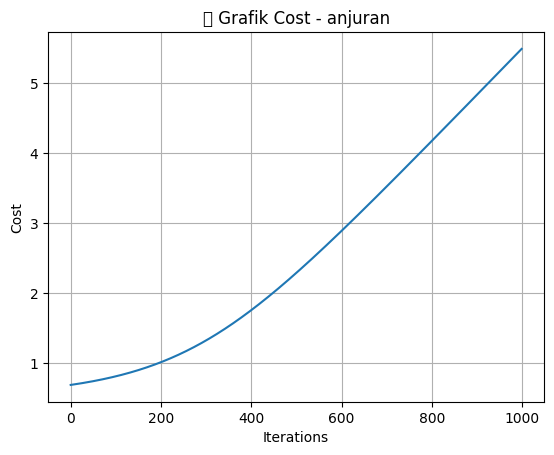

C:\Users\mynam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


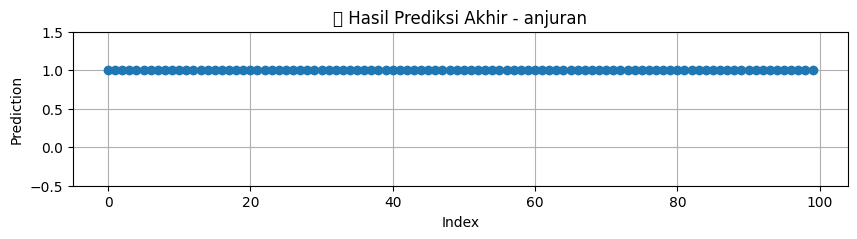


📊 Evaluasi - Label: anjuran
  TP: 1112, TN: 0, FP: 4489, FN: 0
  Accuracy : 0.1985
  Precision: 0.1985
  Recall   : 1.0000
  F1-Score : 0.3313

🔧 Training untuk label: larangan

🚀 Memulai Gradient Descent (1000 iterasi)...


Training larangan:   0%|          | 2/1000 [00:00<00:52, 18.93it/s]

Epoch 0 - Cost: 0.6931


Training larangan:  10%|█         | 104/1000 [00:05<00:46, 19.41it/s]

Epoch 100 - Cost: 0.8901


Training larangan:  20%|██        | 204/1000 [00:10<00:44, 17.90it/s]

Epoch 200 - Cost: 1.2095


Training larangan:  30%|███       | 304/1000 [00:16<00:38, 18.30it/s]

Epoch 300 - Cost: 1.6832


Training larangan:  40%|████      | 404/1000 [00:21<00:31, 19.15it/s]

Epoch 400 - Cost: 2.3002


Training larangan:  50%|█████     | 504/1000 [00:26<00:25, 19.38it/s]

Epoch 500 - Cost: 3.0140


Training larangan:  60%|██████    | 604/1000 [00:32<00:21, 18.78it/s]

Epoch 600 - Cost: 3.7787


Training larangan:  70%|███████   | 704/1000 [00:37<00:17, 16.82it/s]

Epoch 700 - Cost: 4.5667


Training larangan:  80%|████████  | 804/1000 [00:43<00:11, 17.11it/s]

Epoch 800 - Cost: 5.3645


Training larangan:  90%|█████████ | 904/1000 [00:49<00:05, 17.45it/s]

Epoch 900 - Cost: 6.1664


Training larangan: 100%|██████████| 1000/1000 [00:54<00:00, 18.21it/s]


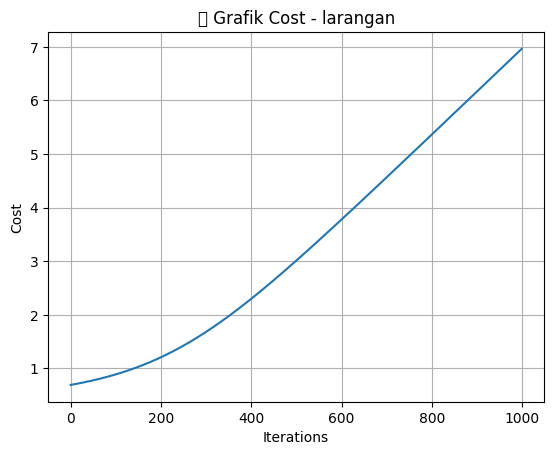

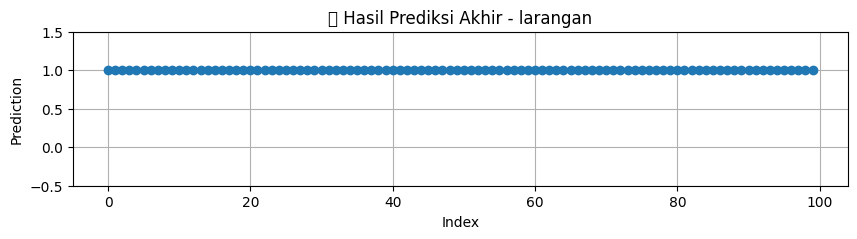


📊 Evaluasi - Label: larangan
  TP: 663, TN: 0, FP: 4938, FN: 0
  Accuracy : 0.1184
  Precision: 0.1184
  Recall   : 1.0000
  F1-Score : 0.2117

🔧 Training untuk label: informasi

🚀 Memulai Gradient Descent (1000 iterasi)...


Training informasi:   0%|          | 2/1000 [00:00<00:54, 18.35it/s]

Epoch 0 - Cost: 0.6931


Training informasi:  10%|█         | 104/1000 [00:05<00:48, 18.52it/s]

Epoch 100 - Cost: 0.9776


Training informasi:  20%|██        | 204/1000 [00:11<00:51, 15.59it/s]

Epoch 200 - Cost: 1.4330


Training informasi:  30%|███       | 304/1000 [00:16<00:36, 18.95it/s]

Epoch 300 - Cost: 2.0829


Training informasi:  40%|████      | 404/1000 [00:22<00:30, 19.59it/s]

Epoch 400 - Cost: 2.8859


Training informasi:  50%|█████     | 504/1000 [00:27<00:28, 17.40it/s]

Epoch 500 - Cost: 3.7745


Training informasi:  60%|██████    | 604/1000 [00:32<00:20, 19.34it/s]

Epoch 600 - Cost: 4.7017


Training informasi:  70%|███████   | 704/1000 [00:37<00:15, 19.47it/s]

Epoch 700 - Cost: 5.6442


Training informasi:  80%|████████  | 804/1000 [00:42<00:10, 19.49it/s]

Epoch 800 - Cost: 6.5927


Training informasi:  90%|█████████ | 904/1000 [00:48<00:04, 19.31it/s]

Epoch 900 - Cost: 7.5434


Training informasi: 100%|██████████| 1000/1000 [00:53<00:00, 18.81it/s]


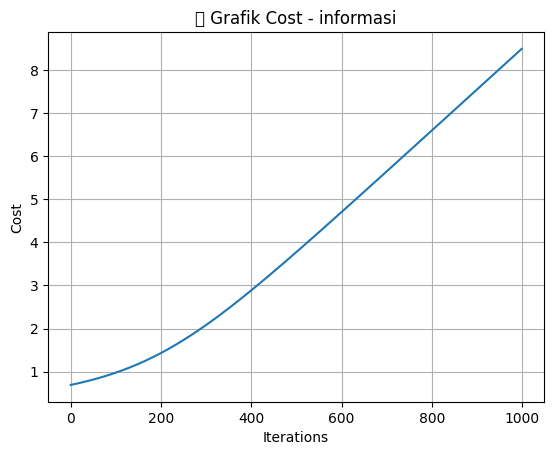

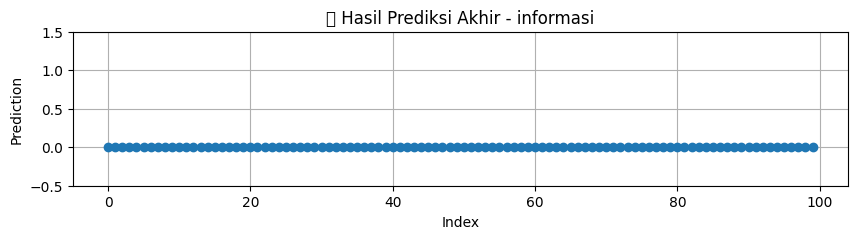


📊 Evaluasi - Label: informasi
  TP: 0, TN: 229, FP: 0, FN: 5372
  Accuracy : 0.0409
  Precision: 0.0000
  Recall   : 0.0000
  F1-Score : 0.0000

✅ Model berhasil disimpan ke '../models/LR_manual_jurnal_np.pkl'


In [4]:
# === Import library ===
import pickle
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from tqdm import tqdm

# === Load Fitur TF-IDF dan Normalisasi ===
with open("../data/tfidf/tfidf_training.pkl", "rb") as f:
    X = pickle.load(f).toarray()

X = np.array(X)
X = X / np.linalg.norm(X, axis=1, keepdims=True)  # ✅ Normalisasi L2 per dokumen

# === Load Label ===
df_train = pd.read_csv("../data/processed/preprocessed_training.csv", delimiter=";")
Y_all = df_train[['anjuran', 'larangan', 'informasi']].values
Y_all = np.array(Y_all)

# === Parameter Dasar ===
m, n = X.shape
alpha = 0.01   # ✅ Learning rate lebih kecil
iterations = 1000
threshold = 0.5

# === Fungsi Sigmoid ===
def sigmoid(z):
    z = np.clip(z, -500, 500)  # ✅ Hindari overflow
    return 1 / (1 + np.exp(-z))

# === Fungsi Cost ===
def compute_cost(Y, Yp):
    Yp = np.clip(Yp, 1e-15, 1 - 1e-15)  # ✅ Cegah log(0)
    return (-1 / m) * np.sum(Y * np.log(Yp) + (1 - Y) * np.log(1 - Yp))

# === Fungsi Gradien ===
def compute_dW(X, Y, Yp):
    return (-1 / m) * np.dot(X.T, (Yp - Y))

def compute_db(Y, Yp):
    return (-1 / m) * np.sum(Yp - Y)

# === Evaluasi Manual ===
def evaluate(Y_true, Y_pred, label_name):
    TP = np.sum((Y_true == 1) & (Y_pred == 1))
    TN = np.sum((Y_true == 0) & (Y_pred == 0))
    FP = np.sum((Y_true == 0) & (Y_pred == 1))
    FN = np.sum((Y_true == 1) & (Y_pred == 0))

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) != 0 else 0

    print(f"\n📊 Evaluasi - Label: {label_name}")
    print(f"  TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")
    print(f"  Accuracy : {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall   : {recall:.4f}")
    print(f"  F1-Score : {f1:.4f}")

# === Training Manual Multi-Label ===
models = {}

for label_index, label_name in enumerate(['anjuran', 'larangan', 'informasi']):
    print(f"\n🔧 Training untuk label: {label_name}")

    Y = Y_all[:, label_index].astype(int)

    # Inisialisasi bobot dan bias
    W = np.zeros(n)
    b = 0.0
    costs = []

    print(f"\n🚀 Memulai Gradient Descent ({iterations} iterasi)...")

    for epoch in tqdm(range(iterations), desc=f"Training {label_name}"):
        Z = np.dot(X, W) + b
        Yp = sigmoid(Z)

        cost = compute_cost(Y, Yp)
        costs.append(cost)

        dW = compute_dW(X, Y, Yp)
        db = compute_db(Y, Yp)

        W -= alpha * dW
        b -= alpha * db

        if epoch % 100 == 0:
            print(f"Epoch {epoch} - Cost: {cost:.4f}")

    # Simpan model
    models[label_name] = (W, b)

    # Visualisasi Cost
    plt.figure()
    plt.plot(range(iterations), costs)
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title(f"📉 Grafik Cost - {label_name}")
    plt.grid(True)
    plt.show()

    # Prediksi akhir (0 atau 1)
    Yp_final = sigmoid(np.dot(X, W) + b)
    Y_pred = (Yp_final > threshold).astype(int)

    # Visualisasi hasil prediksi
    plt.figure(figsize=(10, 2))
    plt.plot(Y_pred[:100], marker='o', linestyle='None')
    plt.title(f"📊 Hasil Prediksi Akhir - {label_name}")
    plt.xlabel("Index")
    plt.ylabel("Prediction")
    plt.ylim(-0.5, 1.5)
    plt.grid(True)
    plt.show()

    # Evaluasi
    evaluate(Y, Y_pred, label_name)

# === Simpan Model ===
with open("../models/LR_manual_jurnal_np.pkl", "wb") as f:
    pickle.dump(models, f)

print("\n✅ Model berhasil disimpan ke '../models/LR_manual_jurnal_np.pkl'")
